In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import mean_squared_error, mean_absolute_error
from random import sample

##Importando as bibliotecas utilizadas

In [9]:
df = pd.read_csv("tibia.csv")
df

,HP,XP,MaxGold,Name
0,7350,4650,999,Dark Torturer
1,8200,6000,700,Demon
2,20000,11200,1694,Juggernaut
3,9500,7216,997,Grimeleech
4,14000,11000,1282,Hellflayer
5,8500,6248,982,Vexclaw
6,5300,4700,1100,Crazed Summer Rearguard
7,5500,5000,1300,Crazed Summer Vanguard
8,4000,2500,636,Behemoth
9,3500,1760,600,Breach Brood


##Importando o dataset para um dataframe do pandas


In [10]:
X = df.iloc[:,0:2].values
X = stats.zscore(X)
X

array([[ 0.41437845,  0.12913526],
       [ 0.65393411,  0.70837345],
       [ 3.97953036,  2.93951317],
       [ 1.02031336,  1.23011689],
       [ 2.28854922,  2.8537001 ],
       [ 0.73848317,  0.81478165],
       [-0.16337344,  0.15058852],
       [-0.1070074 ,  0.27930812],
       [-0.52975269, -0.7933552 ],
       [-0.67066778, -1.11086355],
       [-0.38883759, -0.83626174],
       [-0.5579357 , -0.80193651],
       [-0.89613193, -1.21383923],
       [-0.98068099, -1.11300887],
       [-0.36065457, -0.62172907],
       [-0.6988508 , -0.75044867],
       [-0.47338665, -0.36428987],
       [ 0.85121525,  0.64401365],
       [ 0.17482279,  0.70837345],
       [-0.38883759, -0.06394414],
       [-0.5579357 , -0.06394414],
       [-0.2479225 ,  0.15058852],
       [ 0.45665298,  0.27930812],
       [-1.34706024, -1.3082336 ],
       [ 0.10436524, -0.23557027],
       [-0.09291589, -0.06394414],
       [-0.2479225 , -0.53591601],
       [-0.48747816, -0.83626174],
       [-0.9947725 ,

##Atribuindo a matriz X as variáveis categóricas, e então as padronizando via Z-Score

In [12]:
y = df['MaxGold'].values
y

array([ 999,  700, 1694,  997, 1282,  982, 1100, 1300,  636,  600,  900,
        700,  400,  473,  997,  800, 1020,  699,  400,  500,  500, 1400,
        967,  800,  983,  990,  700,  700,  550,  798,  800,  900],
      dtype=int64)

##Atribuindo a o vetor y a variável alvo

In [41]:
r = sample(range(0, 300), 10)
r

[101, 194, 273, 120, 125, 112, 23, 171, 72, 221]

##Gerando uma lista com 10 valores entre 0 e 300.

In [45]:
y_pred = []
for i in r:
  aux = ((((i+1)*0.57)/111)*X[:,0])**2 + (((0.87*i)/13)*X[:,1])**3 - 23
  y_pred.append(aux)
y_pred

[array([ -22.28788445,   86.88605314, 7824.99200817,  552.10441786,
        7155.00507244,  144.18772066,  -21.93812673,  -16.2679827 ,
        -177.12672568, -446.20165117, -203.55883367, -182.17645646,
        -575.08004465, -448.51854716,  -97.17993972, -153.37931873,
         -37.86760224,   59.68417699,   86.77711808,  -23.03926082,
         -22.99533814,  -21.92858632,  -16.21391353, -713.93137883,
         -27.03396098,  -23.07837244,  -70.51469016, -203.53511883,
        -300.21929482,  -28.44135214,   97.05284037,  -12.6643349 ]),
 array([-1.81151524e+01,  7.55321530e+02,  5.55780729e+04,  4.05158436e+03,
         5.08400884e+04,  1.16128763e+03, -1.55000042e+01,  2.46966788e+01,
        -1.11550660e+03, -3.02250605e+03, -1.30269986e+03, -1.15132114e+03,
        -3.93615489e+03, -3.03940709e+03, -5.48809836e+02, -9.47412607e+02,
        -1.28572502e+02,  5.62271746e+02,  7.54923389e+02, -2.34205797e+01,
        -2.32600492e+01, -1.54651354e+01,  2.48942932e+01, -4.92109825e+03

##Dada uma equação aleatória baseada nos valores da matriz X (como coeficientes), percorre-se a lista e adiciona-se os vetores em uma nova variável.

In [46]:
mae = []
mse = []
for vetor in y_pred:
  mae.append(mean_absolute_error(y, vetor))
  mse.append(mean_squared_error(y, vetor))
print(f'MAE: {mae}')
print(f'MSE: {mse}')
best_mae = min(mae)
best_mse = min(mse)
best_mae_index = np.argmin(mae)
best_mse_index = np.argmin(mse)

MAE: [1222.2963583998935, 4714.407117421219, 12413.780268059265, 1585.2937874561653, 1706.8021745668561, 1417.2072909441458, 870.3221477987249, 3405.2272758349436, 880.4370761619437, 6769.478854274876]
MSE: [3084137.84925004, 171455977.76470172, 1373390821.5426273, 8672151.744987816, 11177539.1292952, 5675440.011914765, 836087.9257398631, 78792406.96683633, 831071.9078037159, 380482887.06463075]


##2 listas são criadas, com uma para armazenar o MAE (mean absolute error), e outra o MSE (mean squared error). percorre-se a lista de vetores e, dado o y real, são calculados tais erros. Os menores erros e seus índices serão adicionados às suas respectivas variáveis.

In [47]:
print(f'o melhor valor de MAE é {best_mae}, no índice {best_mae_index}')
print(f'o melhor valor de MSE é {best_mse}, no índice {best_mse_index}')

o melhor valor de MAE é 870.3221477987249, no índice 6
o melhor valor de MSE é 831071.9078037159, no índice 8


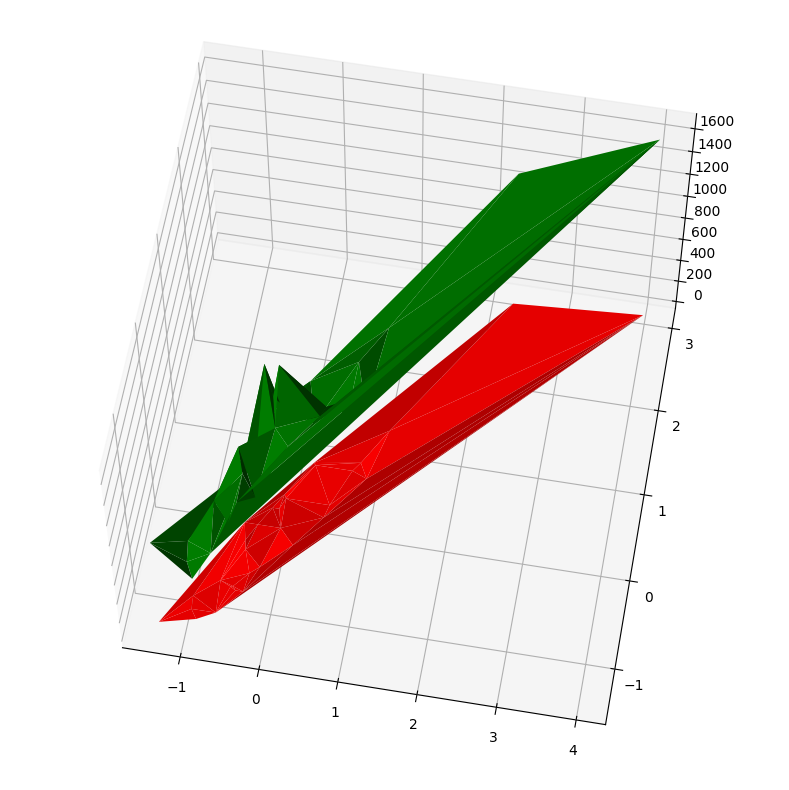

In [48]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred[best_mae_index],color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MAE encontrado.

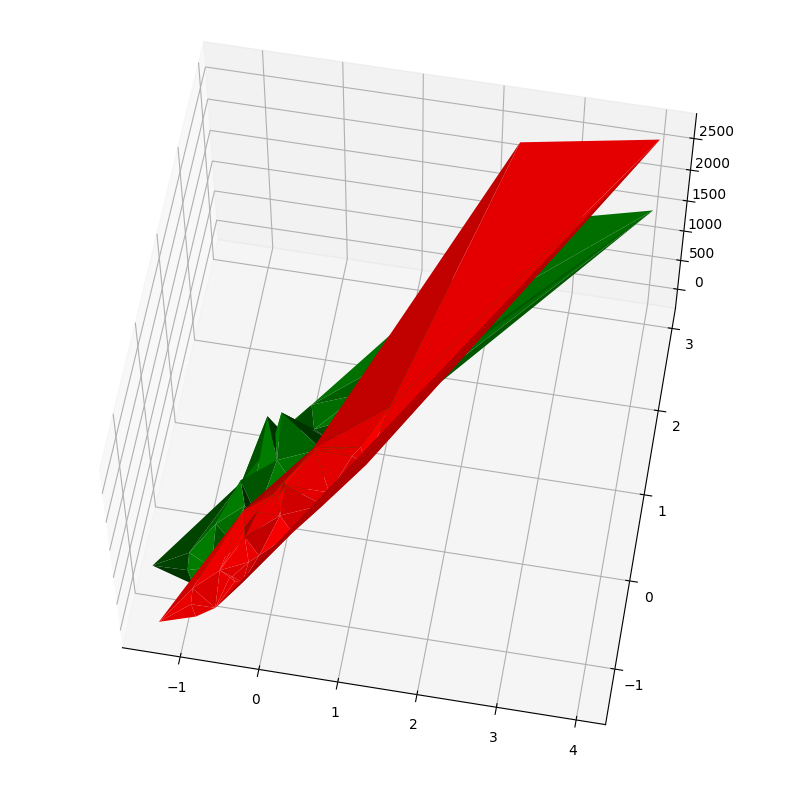

In [49]:
fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(X[:,0], X[:,1], y_pred[best_mse_index],color = 'red')
ax.plot_trisurf(X[:,0], X[:,1], y, color = 'green')
ax.view_init(elev=60, azim=-80)

plt.show()

##É gerada uma imagem com as superfícies, sendo que em verde temos a original, e em vermelho a estimada com o melhor MSE encontrado.